### Project - Bank Churn Prediction

Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.

Context:

Businesses like banks which provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

Data Description:

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling


In [68]:
#Claire Bilski link to GitHub
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-claireebilski.git

SyntaxError: invalid syntax (<ipython-input-68-159f5d587569>, line 2)

#### Objectives
Read the dataset. Initialize & build the model. Identify the points of improvement and implement the same. Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points) Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)



In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

from sklearn import metrics

In [5]:
data = pd.read_csv('bank.csv')
datadf = pd.DataFrame(data)

In [6]:
#Apply info to check datatype
datadf.info()
datadf.describe() #statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
datadf.shape

(10000, 14)

In [8]:
#Finding the number of missing values in datadf
datadf.isnull().values.any() # No null values

False

In [9]:
#### Dropping the columns unqiue to each customer. (5 points) After reviewing the data I have determined these are Row Number, Customer Id, and Surname as these have no impact on whether or not the customer turns over.

In [10]:
data_df = datadf.drop('RowNumber', axis=1)

In [11]:
data_df = data_df.drop('CustomerId', axis=1)

In [12]:
data_df = data_df.drop('Surname', axis=1)

In [13]:
print(data_df)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [14]:
#### Distinguish the features and the target variable (5 points)
# 'Exited' is the target variable
target_0 = data_df[data_df['Exited'] == 0]['Exited'].count()
target_1 = data_df[data_df['Exited']== 1]['Exited'].count()
print(target_0,target_1)

7963 2037


No handles with labels found to put in legend.


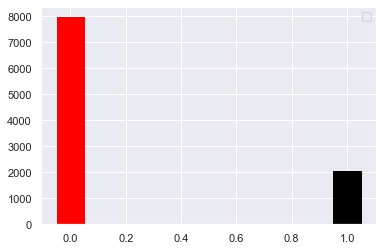

In [15]:
%matplotlib inline
labels = [0,1]
plt.bar(labels[0],target_0, width=0.1,color = 'red',edgecolor='red')
plt.bar(labels[1],target_1,width=0.1,color = 'black',edgecolor='black')
plt.legend()

In [16]:
#The data is imbalanced because we have 80% of zeros and we have 20% of ones that may make problems with predication.

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label = LabelEncoder()
data_df['Geography'] = label.fit_transform(data_df['Geography'])
data_df['Gender'] = label.fit_transform(data_df['Gender'])
print(data_df['Gender'].head(7))

0    0
1    0
2    0
3    0
4    0
5    1
6    1
Name: Gender, dtype: int64


In [18]:
df2=pd.get_dummies(data=data_df,columns=["Geography"])

In [19]:
#Test/train validation data
X=df2.drop(["Exited"],axis="columns")
y=df2["Exited"]

from sklearn.model_selection import train_test_split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.25, random_state=42)

In [20]:
#Feature Engineering
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
target_names = ['Did not Exit', "Exited"]
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
pred = dummy_clf.predict(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89      4769
           1       0.00      0.00      0.00      1231

    accuracy                           0.79      6000
   macro avg       0.40      0.50      0.44      6000
weighted avg       0.63      0.79      0.70      6000



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
num_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
standardized_df = pd.DataFrame(ss.fit_transform(df2[num_features]), columns = num_features)
standardized_df['Exited'] = df2['Exited']

In [26]:
from sklearn.preprocessing import LabelEncoder
le_geography = LabelEncoder()
le_gender = LabelEncoder()
le_HasCrCard = LabelEncoder()
le_IsActiveMember = LabelEncoder()
le_NumOfProducts = LabelEncoder()
le_Tenure = LabelEncoder()

le_df = pd.DataFrame()

le_df['Gender'] = le_gender.fit_transform(df2['Gender'])
le_df['HasCrCard'] = le_HasCrCard.fit_transform(df2['HasCrCard'])
le_df['IsActiveMember'] = le_IsActiveMember.fit_transform(df2['IsActiveMember'])
le_df['NumOfProducts'] = le_NumOfProducts.fit_transform(df2['NumOfProducts'])
le_df['Tenure'] = le_Tenure.fit_transform(df2['Tenure'])

le_df.head()

,Gender,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,0,1,1,0,2
1,0,0,1,0,1
2,0,1,0,2,8
3,0,0,0,1,1
4,0,1,1,0,2


In [27]:
model_df = pd.concat([standardized_df,le_df],axis=1)
model_df.head()

,CreditScore,Age,Balance,EstimatedSalary,Exited,Gender,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,-0.326221,0.293517,-1.225848,0.021886,1,0,1,1,0,2
1,-0.440036,0.198164,0.117350,0.216534,0,0,0,1,0,1
2,-1.536794,0.293517,1.333053,0.240687,1,0,1,0,2,8
3,0.501521,0.007457,-1.225848,-0.108918,0,0,0,0,1,1
4,2.063884,0.388871,0.785728,-0.365276,0,0,1,1,0,2


In [ ]:
#### Divide in training and test sets (5 points)

In [28]:
X = model_df.drop(['Exited'],axis=1)
y = model_df['Exited']
X_train, x_test, y_train, y_test = train_test_split(X,y)

In [ ]:
####Initialize & build the model. Identify the points of improvement and implement the same. Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1973
           1       0.63      0.40      0.49       527

    accuracy                           0.82      2500
   macro avg       0.74      0.67      0.69      2500
weighted avg       0.81      0.82      0.81      2500



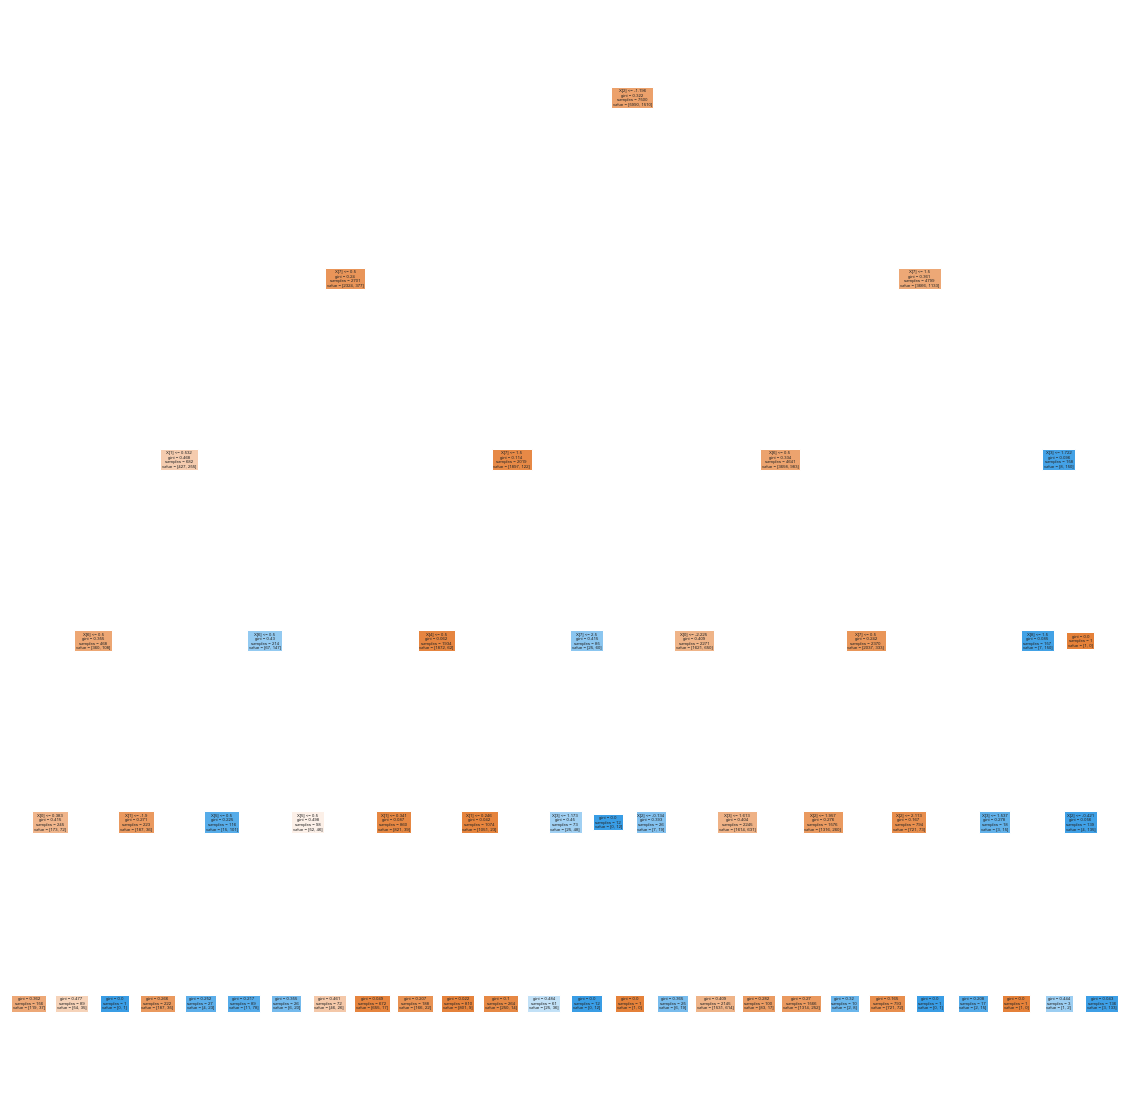

In [29]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error

dt_clf = DecisionTreeClassifier(max_depth=5,max_features='sqrt')

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(x_test)
print(classification_report(y_test, pred))
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(dt_clf.fit(X_train, y_train), ax=ax, filled=True)
plt.show()

In [30]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred = neigh.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      1973
           1       0.58      0.35      0.44       527

    accuracy                           0.81      2500
   macro avg       0.71      0.64      0.66      2500
weighted avg       0.79      0.81      0.79      2500



In [31]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1800, min_samples_split=2, 
                             min_samples_leaf=1, max_features='auto', 
                             max_depth=10, bootstrap=True)
rf.fit(X_train,y_train)
pred = rf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1973
           1       0.78      0.39      0.52       527

    accuracy                           0.85      2500
   macro avg       0.82      0.68      0.71      2500
weighted avg       0.84      0.85      0.83      2500



In [32]:
#Ada Boost
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=1800)
ada_clf.fit(X_train, y_train)
pred = ada_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1973
           1       0.67      0.43      0.53       527

    accuracy                           0.84      2500
   macro avg       0.77      0.69      0.71      2500
weighted avg       0.82      0.84      0.82      2500



In [33]:
#GaussianProcessClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
 
gpc = GaussianProcessClassifier().fit(X_train, y_train)

In [34]:
gpc.score(X_train, y_train)

0.8844

In [35]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB_clf = GaussianNB()
GNB_clf.fit(X_train, y_train)
pred = GNB_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1973
           1       0.69      0.23      0.34       527

    accuracy                           0.82      2500
   macro avg       0.76      0.60      0.62      2500
weighted avg       0.80      0.82      0.78      2500



In [36]:
#SVC model
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_clf.fit(X_train, y_train)
pred = svc_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1973
           1       0.80      0.36      0.49       527

    accuracy                           0.85      2500
   macro avg       0.83      0.67      0.70      2500
weighted avg       0.84      0.85      0.82      2500



In [37]:
#Finally a Nueral Network MLPClassifier
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(max_iter=3000).fit(X_train, y_train)
pred = MLP_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1973
           1       0.76      0.43      0.55       527

    accuracy                           0.85      2500
   macro avg       0.81      0.69      0.73      2500
weighted avg       0.84      0.85      0.83      2500



In [ ]:
####Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)

In [50]:
#Final Model - we are going with MLPClassifier for our NNN classification and now we will find 
#the best parameters and fine tune the model
mlp_gs = MLPClassifier(max_iter=1)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=2)
clf.fit(X, y) # X is train samples and y is the corresponding labels

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=2, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=N...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [51]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [52]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


0.752 (+/-0.086) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.793 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.779 (+/-0.036) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.796 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.706 (+/-0.182) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.542 (+/-0.482) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
0.728 (+/-0.031) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.537 (+/-0.406) 

In [60]:
#y_true, y_pred = y_test , clf.predict(X_test)
#from sklearn.metrics import classification_report
#print('Results on the test set:')
#print(classification_report(y_true, y_pred))

In [58]:
#### Print the Accuracy score and confusion matrix (5points)
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(max_iter=3000).fit(X_train, y_train)
pred = MLP_clf.predict(x_test)
print(classification_report(y_test, pred))
#Accuracy is 0.86 that they will not Exit

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1594
           1       0.76      0.47      0.58       406

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[1534,   60],
       [ 217,  189]])

In [ ]:
#True Positive (observed=1,predicted=1):

#Predicted that bank customers will Exit and the customers are predicted to be part of the churn.

#False Positive (observed=0,predicted=1):

#Predicted that bank customers will Exit and the customers are not predicted to be part of the churn.

#True Negative (observed=0,predicted=0):

#Predicted that bank customers will not Exit of the bank's churn and the customers are not predicted to be part of the churn.

#False Negative (observed=1,predicted=0):

#Predicted that customers will not Exit and the customers are not predicted to be part of the churn.

#Here the bank wants to know the people who are predicted to Exit i.e. less number of False Positive, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not predicted to be part of the churn. Hence Precision is the important metric.

#In case of False negative bank will lose few customers but that okay because the bank would want to retain money more than customers who are not predicted to be part of the churn.
#They can use the model for predicting future customers who exit.